### IPD440 - APRENDIZAJE DE MAQUINAS
# Tarea 4

Nombre: Daniel Alejandro Barriga Villanueva     
Rol: 202030517-K      
Rut: 20.731.884-1      
Correo: daniel.barriga@usm.cl

## Objetivo

El objetivo de esta tarea es entrenar un Simple Agente con Reinforcement Learning.

## Librerías

Importa las bibliotecas necesarias. Recuerda instalar `gym` si no está disponible.

In [1]:
!pip3 install gym


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Configuración del Entorno

Crea el entorno de Gym utilizando el problema "Taxi-v3"

In [3]:
env = gym.make("Taxi-v3")

# Paso 2: Entendiendo el Problema

Define e imprime el espacio de estados (`observation_space.n`) y acciones del entorno (`action_space.n`).

In [4]:
espacio_estados = env.observation_space.n
espacio_acciones = env.action_space.n
print("Espacio de estados (número de estados):", espacio_estados)
print("Espacio de acciones (número de acciones):", espacio_acciones)

Espacio de estados (número de estados): 500
Espacio de acciones (número de acciones): 6


**Responde: ¿Qué representa cada valor?**

En el contexto del entorno Taxi-v3, los valores impresos por el código representan aspectos fundamentales del entorno de aprendizaje por refuerzo:

1. **Espacio de Estados (`espacio_estados`)**: Este valor representa el número total de diferentes configuraciones o situaciones en las que el taxi puede encontrarse dentro del entorno. Cada estado es una representación única de la posición del taxi, la ubicación del pasajero y el destino. En "Taxi-v3", debido a la cuadrícula de 5x5 y las diversas posiciones y destinos de los pasajeros, hay 500 estados posibles.

2. **Espacio de Acciones (`espacio_acciones`)**: Este valor indica el número total de acciones distintas que el taxi puede realizar en cualquier estado dado. Las acciones en "Taxi-v3" incluyen movimientos en cuatro direcciones (norte, sur, este, oeste) y acciones específicas como recoger o dejar a un pasajero. En total, hay 6 acciones posibles en este entorno.

Estos valores son cruciales para entender cómo un agente puede interactuar y aprender dentro del entorno "Taxi-v3", proporcionando una estructura clara para la toma de decisiones y la exploración.

# Paso 3: Entrenamiento del Agente (Q-Learning)

Crea una tabla Q de tamaño (`observation_space.n, action_space.n`) con puros ceros para realizar el aprendizaje y define los siguientes hiperparámetros:

```python
learning_rate = 0.1  # Tasa de aprendizaje
discount_factor = 0.9  # Factor de descuento
exploration_prob = 0.1  # Probabilidad de exploración
episodes = 1000  # Número de episodios de entrenamiento
```

In [5]:
q_table = np.zeros((espacio_estados, espacio_acciones))
# Definición de hiperparámetros
learning_rate = 0.1  # Tasa de aprendizaje
discount_factor = 0.9  # Factor de descuento
exploration_prob = 0.1  # Probabilidad de exploración
episodes = 1000  # Número de episodios de entrenamiento

* El siguiente código realiza un ciclo a través de los episodios. 
* Reinicia el entorno para un nuevo episodio.
* Elije una acción utilizando epsilon-greedy (exploración o explotación).
* Realiza la acción y observa el resultado.
* Actualiza la tabla Q utilizando la ecuación de Q-learning.
* Avanza al siguiente estado.
* Acumula la recompensa total del episodio.

In [6]:
rewards_per_episode = []
for episode in range(episodes):
    initial_state = env.reset()
    state = initial_state[0]  
    done = False
    total_reward = 0
    while not done:
        if np.random.rand() < exploration_prob:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])
        next_state, reward, done, _, _ = env.step(action)  
        # Actualización de la tabla Q
        q_table[state, action] = (1 - learning_rate) * q_table[state, action] + learning_rate * (
            reward + discount_factor * np.max(q_table[next_state, :])
        )
        state = next_state
        total_reward += reward
    print(f"Episodio {episode + 1}: Recompensa total = {total_reward}")
    rewards_per_episode.append(total_reward)

Episodio 1: Recompensa total = -1889
Episodio 2: Recompensa total = -1514
Episodio 3: Recompensa total = -2308
Episodio 4: Recompensa total = -992
Episodio 5: Recompensa total = -2963
Episodio 6: Recompensa total = -1961
Episodio 7: Recompensa total = -1955
Episodio 8: Recompensa total = -1963
Episodio 9: Recompensa total = -1142
Episodio 10: Recompensa total = -1066
Episodio 11: Recompensa total = -268
Episodio 12: Recompensa total = -405
Episodio 13: Recompensa total = -631
Episodio 14: Recompensa total = -2019
Episodio 15: Recompensa total = -686
Episodio 16: Recompensa total = -912
Episodio 17: Recompensa total = -789
Episodio 18: Recompensa total = -1280
Episodio 19: Recompensa total = -962
Episodio 20: Recompensa total = -1166
Episodio 21: Recompensa total = -552
Episodio 22: Recompensa total = -598
Episodio 23: Recompensa total = -476
Episodio 24: Recompensa total = -509
Episodio 25: Recompensa total = -827
Episodio 26: Recompensa total = -358
Episodio 27: Recompensa total = -10

/opt/homebrew/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episodio 40: Recompensa total = -599
Episodio 41: Recompensa total = -483
Episodio 42: Recompensa total = -578
Episodio 43: Recompensa total = -430
Episodio 44: Recompensa total = -407
Episodio 45: Recompensa total = -436
Episodio 46: Recompensa total = -316
Episodio 47: Recompensa total = -222
Episodio 48: Recompensa total = -291
Episodio 49: Recompensa total = -262
Episodio 50: Recompensa total = -331
Episodio 51: Recompensa total = -430
Episodio 52: Recompensa total = -423
Episodio 53: Recompensa total = -478
Episodio 54: Recompensa total = -165
Episodio 55: Recompensa total = -683
Episodio 56: Recompensa total = -305
Episodio 57: Recompensa total = -532
Episodio 58: Recompensa total = -424
Episodio 59: Recompensa total = -606
Episodio 60: Recompensa total = -34
Episodio 61: Recompensa total = -382
Episodio 62: Recompensa total = -310
Episodio 63: Recompensa total = -452
Episodio 64: Recompensa total = -405
Episodio 65: Recompensa total = -141
Episodio 66: Recompensa total = 8
Episo

# Paso 4: Visualización del Progreso del Agente

Adapta el código anterior para graficar el progreso del agente (`rewards_per_episode`) usando como eje-x los episodios (`episode`) y eje-y la recompensa total (`total_reward`).

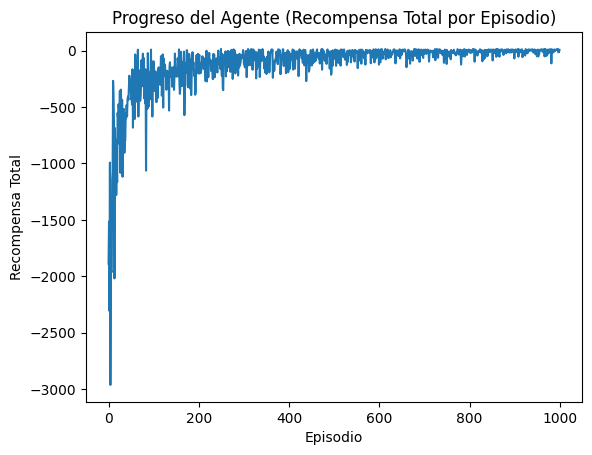

In [7]:
# Graficar el progreso
plt.plot(rewards_per_episode)
plt.title('Progreso del Agente (Recompensa Total por Episodio)')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.show()

**Comenta y analiza el gráfico obtenido.**

El gráfico muestra la recompensa total obtenida por el agente en cada episodio durante 1000 episodios de entrenamiento en el entorno "Taxi-v3".

Análisis del gráfico:

1. **Mejora Inicial Rápida**: Al principio, hay una mejora significativa en la recompensa total. Esto indica que el agente está aprendiendo rápidamente cómo navegar en el entorno y cómo recoger y dejar pasajeros de manera más eficiente.

2. **Estabilización de la Recompensa**: Después del inicio, la recompensa total se estabiliza. Aunque sigue siendo negativa, el descenso en la magnitud de las recompensas negativas sugiere que el agente ha aprendido a evitar las penalizaciones más costosas.

3. **Recompensas Consistentemente Negativas**: A lo largo de los 1000 episodios, la recompensa total no alcanza valores positivos. Esto es indicativo de que el agente aún incurre en penalizaciones, lo que puede deberse a que todavía está tomando acciones subóptimas o porque el entorno es desafiante y el agente necesita más tiempo o cambios en los hiperparámetros para aprender a maximizar las recompensas.

4. **Posible Convergencia**: La relativa planitud de la gráfica hacia el final sugiere que el agente puede haber convergido a una política particular. Sin embargo, dado que la recompensa sigue siendo negativa, esta política no es óptima.

De acuerdo con los criterios teóricos del funcionamiento del "Taxi-v3":

- **Penalizaciones vs Recompensas**: En "Taxi-v3", el agente recibe una pequeña recompensa por una acción exitosa y una penalización por acciones incorrectas o ineficientes. El gráfico sugiere que el agente no ha aprendido a maximizar las recompensas positivas suficientemente para superar las penalizaciones.

- **Balance entre Exploración y Explotación**: Parece que el agente no ha equilibrado efectivamente la exploración de nuevas estrategias con la explotación de las estrategias conocidas. Si la exploración es demasiado baja, el agente puede no descubrir acciones más óptimas.

Para mejorar el aprendizaje del agente, se podria considerar lo siguiente:

- **Ajustar Hiperparámetros**: Revisar y posiblemente ajustar la tasa de aprendizaje, el factor de descuento y la estrategia de exploración (por ejemplo, implementar un decaimiento en la probabilidad de exploración).

- **Análisis Detallado de la Política**: Observar las acciones específicas que toma el agente y determinar si son lógicas dadas las metas del entorno.

- **Extensión del Entrenamiento**: Permitir que el agente continúe entrenando más allá de 1000 episodios para ver si la tendencia mejora.

- **Evaluación de la Estrategia de Recompensa**: Considerar si la estructura de recompensas del entorno "Taxi-v3" necesita ser ajustada para promover un aprendizaje más efectivo.

El gráfico indica que, aunque el agente ha aprendido algo sobre el entorno y cómo navegarlo, todavía hay mucho espacio para mejorar su rendimiento y alcanzar una política óptima.

Además se puede considerar en un bajo porcentaje de casos recompensa positiva.

# Paso 5: Análisis y documentación

Discute los desafíos encontrados y posibles mejoras en el proceso de aprendizaje del agente.

En el proceso de adaptación del agente al entorno "Taxi-v3" se presentaron varios desafíos que requirieron ajustes tanto en el código como en la estrategia de entrenamiento. A continuación, discuto los desafíos encontrados y propongo posibles mejoras.

**Desafíos Enfrentados:**

1. **Estructura de Estado Inesperada**: Originalmente, el código asumía que el estado devuelto por `env.reset()` y `env.step(action)` era un entero. Sin embargo, el entorno devolvió una tupla con información adicional. Este problema se abordó extrayendo el estado relevante de la tupla.

2. **Recompensas Negativas**: Durante el entrenamiento, las recompensas totales fueron consistentemente negativas. Esto indicó que el agente no estaba aprendiendo una estrategia efectiva para maximizar las recompensas en el entorno. Se ajustó el enfoque de exploración y se realizaron cambios para registrar y analizar las recompensas por episodio.

**Posibles Mejoras:**

1. **Ajuste de Hiperparámetros**: La tasa de aprendizaje, el factor de descuento y la probabilidad de exploración son críticos para el aprendizaje del agente. Experimentar con estos valores podría conducir a un mejor rendimiento.

2. **Estrategia de Exploración Decreciente**: Implementar una política de exploración decreciente, como epsilon-decay, podría ayudar al agente a explorar eficientemente al principio y luego explotar más su conocimiento a medida que aprende.

3. **Incrementar Episodios de Entrenamiento**: Puede ser beneficioso aumentar el número de episodios para darle al agente más oportunidades de aprender.

4. **Recompensas y Penalizaciones**: Analizar si el esquema de recompensas y penalizaciones se alinea con los objetivos deseados. Ajustar estos valores podría facilitar un aprendizaje más rápido y efectivo.

5. **Análisis de la Política Aprendida**: Observar las acciones específicas que toma el agente y entender cómo se relacionan con el entorno y las recompensas obtenidas. Esto podría indicar si el agente está aprendiendo comportamientos óptimos.

6. **Monitoreo Continuo**: La impresión de la recompensa total por episodio y la visualización de las recompensas a lo largo del tiempo son herramientas útiles para monitorear el progreso del agente. Estas prácticas deberían continuar para permitir ajustes oportunos en la estrategia de entrenamiento.